In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv(r"C:\Users\kandu\Downloads\mental_health_workplace_survey.csv") ##file

In [4]:
categorical_cols = df.select_dtypes(include='object').columns##categorical columns.
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    

In [8]:
X = df.drop("BurnoutRisk", axis=1) ##defining our feature
y = df["BurnoutRisk"]##our predict
X_scaled = StandardScaler().fit_transform(X)##scaling the features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5) ##splittig the data


In [14]:
##Model Training and evaluating.
classifiers = {'Logistic Regression': LogisticRegression(max_iter=1000),'LDA': LinearDiscriminantAnalysis()} ##what we want to compare 
plt.figure(figsize=(10, 8))##plot for ROC curve
for name, algorithm in classifiers.items():##loop for each model to tain,evaluate and plot the ROC Curve.
    algorithm.fit(X_train, y_train)
    y_pred_class = algorithm.predict(X_test) ##predictions on the test data.
    y_pred_proba = algorithm.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred_class)##calculating accuracy
    roc_auc = roc_auc_score(y_test, y_pred_proba)##calculating roc_accuracy
    conf_matrix = confusion_matrix(y_test, y_pred_class)##calculating confussion matrix

print(f"\nResults for {name}:")
print(f"  Accuracy: {accuracy:.2f}")
print(f"  ROC-AUC Score: {roc_auc:.2f}")
print(f"  Confusion Matrix:\n{conf_matrix}")



Results for LDA:
  Accuracy: 0.96
  ROC-AUC Score: 1.00
  Confusion Matrix:
[[390  22]
 [  0 188]]


<Figure size 1000x800 with 0 Axes>

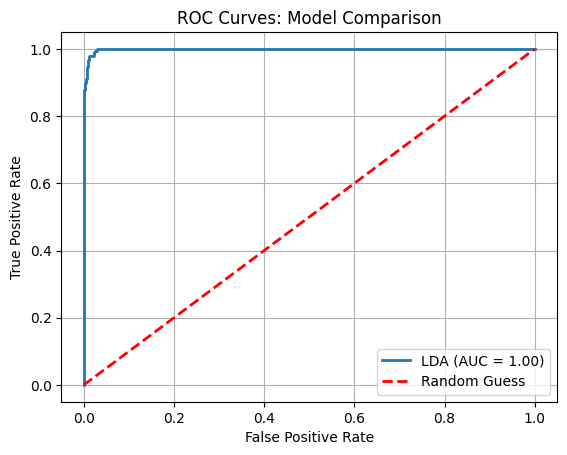

In [15]:
##ROC Curve plotting 
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)##calculating the values for the ROC Curve.
plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')##plotting the curve for the current model 
plt.plot([0, 1], [0, 1], 'r--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Model Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()